# IRIS Flower Data

Reference: [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Use seaborn to get the iris data by using: iris = sns.load_dataset('iris') **

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [12]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

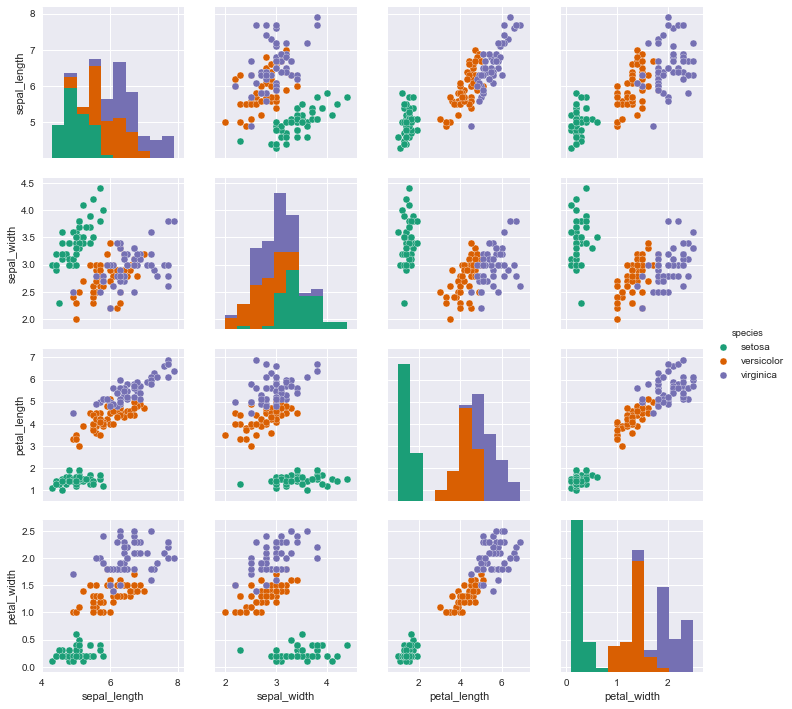

In [14]:
sns.pairplot(iris,hue='species',palette='Dark2')

Setosa seems to be clearly separable from the other two species.

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

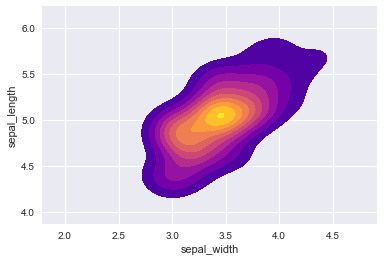

In [16]:
setosa = iris[iris.species =='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species',axis=1), iris['species'], test_size=0.3, random_state=101)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [20]:
from sklearn.svm import SVC

In [22]:
model = SVC()

In [23]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

In [24]:
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      1.00      1.00        20
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



## Inference

Interesting! The model is 100% accurate as it has predicted all values correctly. No room for further optimization using Grid search.